In [174]:
def apol_fourth_circle(a,b,c):
    d=a+b+c-2*sqrt(a*b+a*c+b*c)
    return d
def is_desc_quad(V=vector):
    return 2*(V[0]^2+V[1]^2+V[2]^2+V[3]^2)==(V[0]+V[1]+V[2]+V[3])^2
def apol_swap(V=vector,n=1):
    D=[0,0,0,0]
    for i in range(0,4):
        D[i]=V[i]
    d=0
    for i in range(0,4):
        if i!=n-1:
            d=d+2*V[i]
    D[n-1]=d-V[n-1]
    return D
def apol_crossterms(a,b,c):
    return a*b+a*c+c*b
#remove last entry of vector
def vector_remove(V):
    RV=[]
    for i in range(0,len(V)-1):
        RV.append(V[i])
    return RV;
def apol_reduce(V):
    swap=0
    D=V
    while swap<=3:
        if apol_swap_size_quad(D,swap,D[swap])==1:
            D=D*apol_Sn(swap)
            swap=-1
        swap+=1
    return D;

In [2]:
import numpy as np
def apol_Sn(n):
    if n+1==1:
        return matrix([[-1,0,0,0],[2,1,0,0],[2,0,1,0],[2,0,0,1]])
    if n+1==2: 
        return matrix([[1,2,0,0],[0,-1,0,0],[0,2,1,0],[0,2,0,1]])
    if n+1==3: 
        return matrix([[1,0,2,0],[0,1,2,0],[0,0,-1,0],[0,0,2,1]])
    if n+1==4: 
        return matrix([[1,0,0,2],[0,1,0,2],[0,0,1,2],[0,0,0,-1]])
    else:
        return matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]);

In [154]:
#input desc quad matrix, which circle to swap, and bound. outputs swapped curv size compared to bound
#1 is smaller, -1 is larger, 0 is same size
#default index is 0 and default bound is 0
def apol_swap_size(D=matrix, index=0, bound=0):
    swapD=D*apol_Sn(index)
    if swapD[0][index]< bound:
        return 1
    if swapD[0][index]==bound:
        return 0
    if swapD[0][index]>bound:
        return -1
#same as before but for just quadruple vector
def apol_swap_size_quad(D=vector, index=0, bound=0):
    swapD=D*apol_Sn(index)
    if swapD[index]< bound:
        return 1
    if swapD[index]==bound:
        return 0
    if swapD[index]>bound:
        return -1
#input descarte quad and output circle vector of [x-center, y-center, radius] for all 4 circles 
def isolate_circle(M=matrix):
    circles=[]
    for i in range(0,4):
        p=M[0][i]
        r=M[1][i]
        s=M[2][i]
        if p!=0:
            circles.append([r/p,s/p, 1/p])
    return circles;
#input descarte quad matrix and output circle vector of [x-center, y-center, radius] only for curvature<=n, default 100
def isolate_circle_curv(D=matrix, n=100):
    circles=[]
    for i in range(0,4):
        p=D[0][i]
        r=D[1][i]
        s=D[2][i]
        if p<=n:
            circles.append([r/p,s/p, 1/p])
    return circles;
#add the circle vectors ([x-center, y-center,radius]) in vector circ to a vector, 
#M, of circle vector but not ones already in given vector
#input(collection of many circles vector, collection of circles to add to first)
def Vec_vec_circles(M=vector, circ=vector):
    in_array=0 
    for i in range(0,len(circ)):
        in_array=0 #if changed to 1, know that circle is already in vector
        for j in range(0,len(M)):
            if M[j]==circ[i]: #searching for same circle
                in_array=1
        if in_array==0:
            M.append(circ[i]) #circle not already in vector so add it
    return M;
#input vector V and descartes quad matrix D to add circles to V
def apol_circle_vectors(V=vector, D=matrix):
    Dcircles=isolate_circle(D)
    return Vec_vec_circles(V,Dcircles);
#input vector V and descartes quad matrix D to add circles with curv<=n (default n=100) to V
def apol_circle_vectors_curv(V=vector, D=matrix,n=100):
    Dcircles=isolate_circle_curv(D,n)
    return Vec_vec_circles(V,Dcircles);
#given vector of circles vectors graph it 
def graph_circle_vec(V=vector, color='blue'):
    G=Graphics()
    for i in range(0,len(V)):
        G+=circle((V[i][0],V[i][1]),V[i][2], edgecolor=color)
        #if i%10==0:
            #print(i)
    return G;
#finding number of checks done, only used in apol_path_terminate 
#finds the number of quadruples checked in the previous step of algorithm
def prev_count(loc):
    count=0
    last=len(loc)-1 #index of where currently
    swapCount=loc[last]+1 #next swap to do
    prev=loc[last-1]
    for i in range(0,swapCount):
        if i!=prev:
            count+=1
    return count
#given starting quad2, bound, starting swap s, prevSwap, location from base quad, and vector allQuad 
#returns all the quadruples that have curvatures less than bound branching off from starting point s
#for example if s=0 then gives all quadruples after S_1*quad2 that contain curvatures<=bound
def apol_path_terminate_quad(quad2, bound, s, prevSwap, location, allQuad):
    counterQuad=0
    numberLoops=0
    changingQuad=[]
    swap=s
    L=len(location)
    while changingQuad != quad2:
        swap=swap%4
        if numberLoops==0: #so we can start loop with changingQuad=quad2
            changingQuad=quad2
        #print([numberLoops], [swap, counterQuad, prevSwap, location, changingQuad])
        if swap==prevSwap: #dont undo the previous swap
            swap=(swap+1)%4
            #print('had to one up swap')
        #if apol_swap_size_quad(changingQuad,swap,bound)<=-1:
            #print('fail')
            #print(swap, counterQuad,changingQuad)
        if apol_swap_size_quad(changingQuad,swap,bound)>-1:
            location.append(swap) #keep track of location
            prevSwap=swap #keep track of previous swap
            changingQuad=changingQuad*apol_Sn(swap)
            allQuad.append(changingQuad)
            swap=-1 #reset swap position to 0 after adding 1
            counterQuad=-1 #reset the number of swaps weve done after adding 1
            #print([swap, counterQuad, prevSwap, location, changingQuad])
        swap=(swap+1)
        counterQuad+=1
        while counterQuad>=3 and len(location)!=L: #path terminated, need to check for more paths 
            if location[len(location)-1]==3:
                changingQuad=changingQuad*apol_Sn(location[len(location)-1]) #go back one step to continue searching
                counterQuad=prev_count(location) #update counter
                swap=location[len(location)-1]+1 #next swap
                location=vector_remove(location) #update location
                prevSwap=location[len(location)-1] #previous swap
                #print([swap, counterQuad, prevSwap, location, changingQuad])
                #print('THREE')
            if location[len(location)-1]!=3 and len(location)!=L:
                changingQuad=changingQuad*apol_Sn(location[len(location)-1]) #go back one step to continue searching
                swap=location[len(location)-1]+1 #next swap
                counterQuad=prev_count(location) #update counter
                location=vector_remove(location) #update location
                prevSwap=location[len(location)-1] #previous swap
                #print([swap, counterQuad, prevSwap, location, changingQuad])
        numberLoops+=1
    return (allQuad)
#given starting quad2, bound, starting swap s, prevSwap, location from base quad, and vector allQuad 
#returns all the quadruples that have curvatures less than bound branching off from starting point s
#for example if s=0 then gives all quadruples after S_1*quad2 that contain curvatures<=bound
#for matrices not vectors 
def apol_path_terminate(quad2, bound, s, prevSwap, location, allQuad):
    counterQuad=0
    numberLoops=0
    changingQuad=[]
    swap=s
    L=len(location)
    while changingQuad != quad2:
        swap=swap%4
        if numberLoops==0: #so we can start loop with changingQuad=quad2
            changingQuad=quad2
        #print([numberLoops], [swap, counterQuad, prevSwap, location, changingQuad])
        if swap==prevSwap: #dont undo the previous swap
            swap=(swap+1)%4
            #print('had to one up swap')
        #if apol_swap_size_quad(changingQuad,swap,bound)<=-1:
            #print('fail')
            #print(swap, counterQuad,changingQuad)
        if apol_swap_size(changingQuad,swap,bound)>-1:
            location.append(swap) #keep track of location
            prevSwap=swap #keep track of previous swap
            changingQuad=changingQuad*apol_Sn(swap)
            allQuad.append(changingQuad)
            swap=-1 #reset swap position to 0 after adding 1
            counterQuad=-1 #reset the number of swaps weve done after adding 1
            #print([swap, counterQuad, prevSwap, location, changingQuad])
        swap=(swap+1)
        counterQuad+=1
        while counterQuad>=3 and len(location)!=L: #path terminated, need to check for more paths 
            if location[len(location)-1]==3:
                changingQuad=changingQuad*apol_Sn(location[len(location)-1]) #go back one step to continue searching
                counterQuad=prev_count(location) #update counter
                swap=location[len(location)-1]+1 #next swap
                location=vector_remove(location) #update location
                prevSwap=location[len(location)-1] #previous swap
                #print([swap, counterQuad, prevSwap, location, changingQuad])
                #print('THREE')
            if location[len(location)-1]!=3 and len(location)!=L:
                changingQuad=changingQuad*apol_Sn(location[len(location)-1]) #go back one step to continue searching
                swap=location[len(location)-1]+1 #next swap
                counterQuad=prev_count(location) #update counter
                location=vector_remove(location) #update location
                prevSwap=location[len(location)-1] #previous swap
                #print([swap, counterQuad, prevSwap, location, changingQuad])
        numberLoops+=1
    return (allQuad)
#find all circles in packing, with desc quad matrix D, with curvature <= C
def apol_make_vec_circle(D=matrix, bound=100):
    allQuad=[D] #vector that stores all desc matrix 
    for s in range(0,4): #get all quads with curvature<=bound
        swap=s
        quad=D #assuming D is reduced to base? 
        location=[-1]
        prevSwap=-1
        quad2=quad*apol_Sn(prevSwap)
        #swap=
        #dummy=[]
        allQuad=apol_path_terminate(quad2, bound, swap, prevSwap, location, allQuad)
        #allQuad.append(dummy)
    Vector_of_circles=[]
    for i in range(0,len(allQuad)): #make the circle vectors from collection of desc matrix 
        dummy=[]
        dummy=apol_circle_vectors(Vector_of_circles, allQuad[i])
        Vector_of_circles=dummy
    return Vector_of_circles
        

In [157]:
#find centers and co-curvatures given quadruple 

#given quadruple find centers
def apol_find_centers(D):
    D.sort()
    centers=[]
    x, y, z= var('x, y, z')
    if (D[0]*D[1]*D[2]*D[3])!=0:
        if D[0]<0:
            b=D[1]
            c=D[2]
            d=D[3]
        elif D[0]>0:
            b=D[0]
            c=D[1]
            d=D[2]
        centers=[[b,0,1/b],[c,0,-1/c]]
        solutions=solve([x^2+(y-1/b)^2==(1/b+1/d)^2, x^2+(y+1/c)^2==(1/c+1/d)^2],x,y,solution_dict=True) #find center through distance formula
        soln=[[s[x], s[y]] for s in solutions]
        L=len(soln)-1
        dCenter=[d, soln[L][0], soln[L][1]]
        centers.append(dCenter)
        #use equation from complex desc eq to find last center 
        sum_of_curv=D[0]+D[1]+D[2]+D[3] 
        a=sum_of_curv-b-c-d
        sum_curv_center=0
        sum_curv2_center=0
        for i in range(0,len(centers)):
            sum_curv_center+=ComplexDoubleElement(centers[i][0]*centers[i][1],centers[i][0]*centers[i][2])
            sum_curv2_center+=ComplexDoubleElement(centers[i][0]^2*centers[i][1],centers[i][0]^2*centers[i][2])
        sol=solve([a^2*z+sum_curv2_center==(1/2)*(sum_of_curv)*(sum_curv_center+a*z)],z, solution_dict=True)
        A=[[s[z]] for s in sol]
        aCenter=[a, real(A[0][0]), imag(A[0][0])]
        centers.append(aCenter)
    return centers;
#find co-curv given curv and center
#gives vector [curv,curv*x-center,curv*y-center, co-curv]
def apol_cocurv(V):
    p=V[0]
    r=V[1]*V[0]
    s=V[2]*V[0]
    q=(r^2+s^2-1)*1/p
    return [p,r,s,q]
#input quadruple and output the desc matrix
def apol_desc_matrix(D):
    V=apol_find_centers(D)
    curv=[]
    reCurvcenter=[]
    imCurvcenter=[]
    cocurv=[]
    for k in range(0,4):
        col=apol_cocurv(V[k])
        curv.append(col[0])
        reCurvcenter.append(col[1])
        imCurvcenter.append(col[2])
        cocurv.append(col[3])
    M=matrix([curv, reCurvcenter, imCurvcenter, cocurv])
    return M

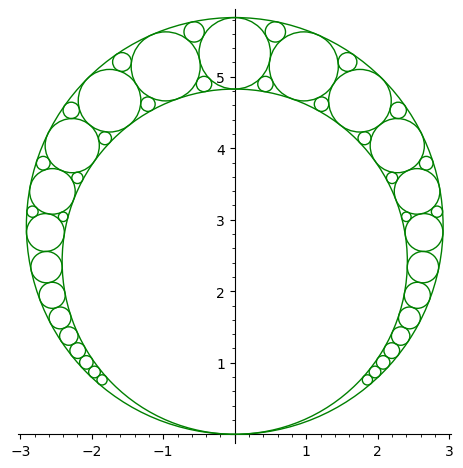

In [161]:
a=-6+4*sqrt(2)
b=-1+sqrt(2)
c=2
d=-5+5*sqrt(2)
D=matrix([[a,b,c,d], [0, 0, 0, d*(2*sqrt(2)/5+2/5)], 
          [-1, 1, c*(1/c + 2/b), d*(9*sqrt(2)/5 +13/5)],[0,0,28+20*sqrt(2),28+20*sqrt(2)]])
V=apol_make_vec_circle(D, 15)
H=graph_circle_vec(V,'green')
H

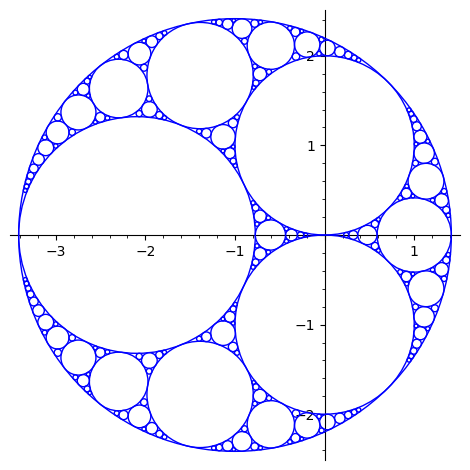

In [162]:
a=1-sqrt(2)
b=1
c=1
d=1+sqrt(2)
D=matrix([[a,b,c,d], [-a, 0, 0, d], 
          [0,1,-1,0],[2,0,0,2]])
V=apol_make_vec_circle(D, 50)
#len(V)
#print(V[3])
#for i in range(0,7):
    #print(V[i])
graph_circle_vec(V)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230


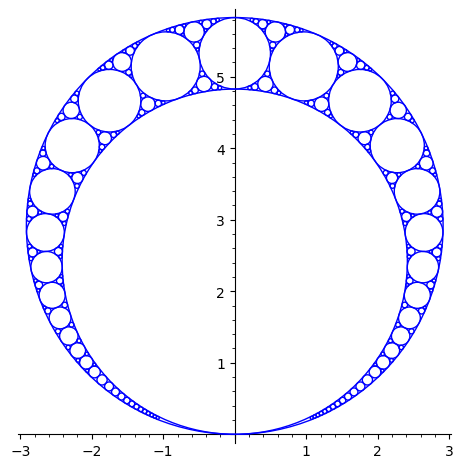

In [163]:
G=Graphics()
a=-6+4*sqrt(2)
b=-1+sqrt(2)
c=2
d=-5+5*sqrt(2)
D=matrix([[a,b,c,d], [0, 0, 0, d*(2*sqrt(2)/5+2/5)], 
          [-1, 1, c*(1/c + 2/b), d*(9*sqrt(2)/5 +13/5)],[0,0,28+20*sqrt(2),28+20*sqrt(2)]])
V=apol_make_vec_circle(D, 50)
for i in range(0,len(V)):
    G+=circle((V[i][0],V[i][1]),V[i][2])
    if i%10==0:
        print(i)
G

(sqrt2 - 1, 2, 5*sqrt2 - 5, 4*sqrt2 - 6)
-2250586810/7722793*sqrt2 + 3182810390/7722793


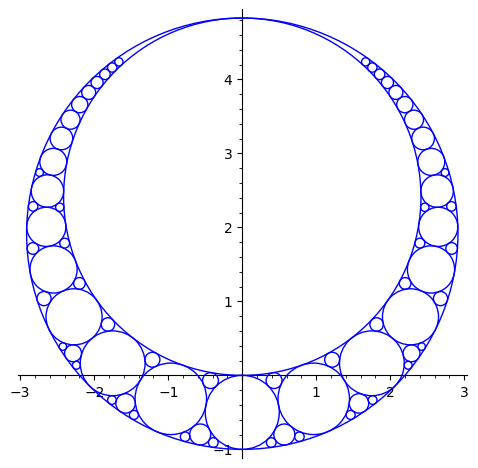

In [199]:
x = polygen(ZZ, 'x')
K.<sqrt2>= QuadraticField(2);
a=-6+4*sqrt(2)
b=-1+sqrt(2)
c=2
d=-5+5*sqrt(2)
D=apol_desc_matrix([a,b,c,d])
#print(D)
r1=[K(D[0][0]),K(D[0][1]), K(D[0][2]),K(D[0][3])]
r2=[K(D[1][0]),K(D[1][1]), K(D[1][2]),K(D[1][3])]
r3=[K(D[2][0]),K(D[2][1]), K(D[2][2]),K(D[2][3])]
r4=[K(D[3][0]),K(D[3][1]), K(D[3][2]),K(D[3][3])]
dD=matrix([r1,r2,r3,r4])
print(dD[0])
d*D[1][3]
V=apol_make_vec_circle(D, 20)

print(10/7722793*(2*sqrt2 - 3)*(sqrt2 - 1)*(38613965*sqrt2/(sqrt2 - 1) - 54608393/(sqrt2 - 1)))
graph_circle_vec(V)

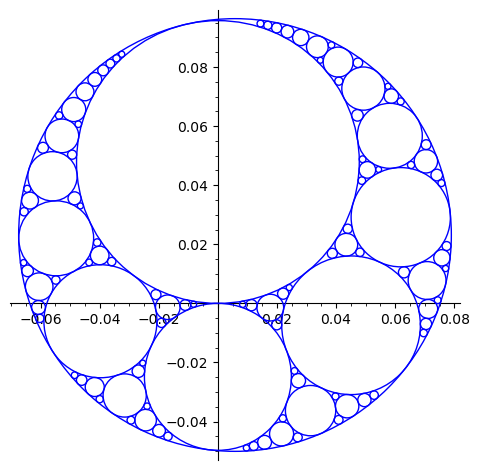

In [167]:
D=apol_desc_matrix([-4*sqrt(2) - 8, 15*sqrt(2) + 19,  7*sqrt(2) + 11, 16*sqrt(2) + 20])
V=apol_make_vec_circle(D, 1000)
graph_circle_vec(V)

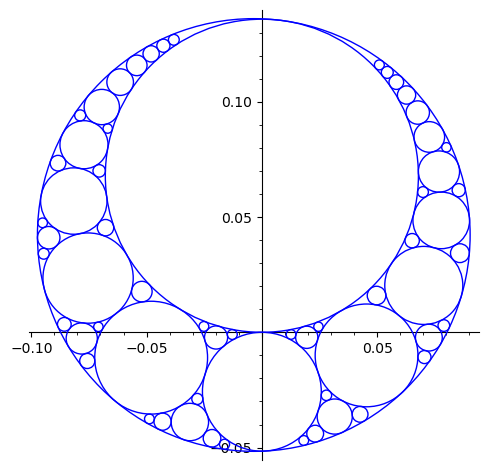

In [171]:
D=apol_desc_matrix([-4*sqrt(2) - 5, 14*sqrt(2) + 19, 19*sqrt(2) + 18,  9*sqrt(2) + 2])
V=apol_make_vec_circle(D, 500)
graph_circle_vec(V)

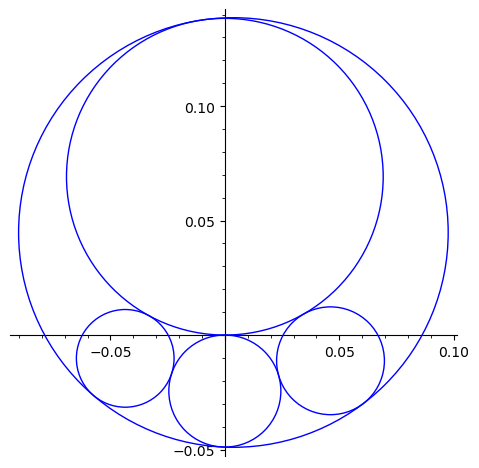

In [179]:
D=apol_desc_matrix([ -4*sqrt(2) - 5, 18*sqrt(2) - 11, 19*sqrt(2) + 14, 47*sqrt(2) - 24])
V=apol_make_vec_circle(D, 50)
graph_circle_vec(V)

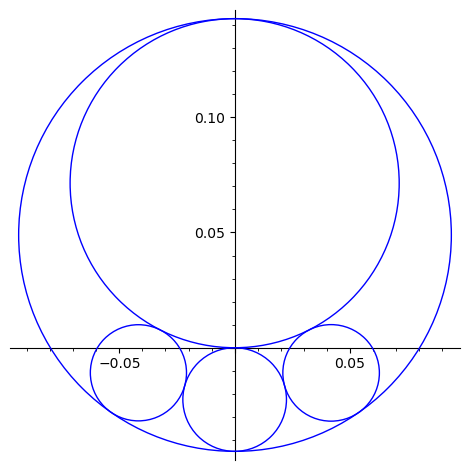

In [181]:
D=apol_desc_matrix([-4*sqrt(2) - 5, 29*sqrt(2) - 27, 134*sqrt(2) - 145, 265*sqrt(2) - 327])
V=apol_make_vec_circle(D, 50)
graph_circle_vec(V)

In [176]:
apol_reduce(vector([-4*sqrt(2) - 5, 14*sqrt(2) + 19, 19*sqrt(2) + 18,  9*sqrt(2) + 2]))

(-4*sqrt(2) - 5, 14*sqrt(2) + 19, 19*sqrt(2) + 14, 9*sqrt(2) + 2)

In [177]:
apol_reduce(vector([ -4*sqrt(2) - 5, 18*sqrt(2) - 11, 19*sqrt(2) + 14, 47*sqrt(2) - 24]))

(-4*sqrt(2) - 5, 18*sqrt(2) - 11, 19*sqrt(2) + 14, 47*sqrt(2) - 24)